In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

In [2]:
# assign path
path, dirs, files = next(os.walk("data/halfhourly_dataset/"))
file_count = len(files)
# create empty list
df_list = []

#blocks with problems: 51 12 33 13 19 108 9
files = ["block_0.csv", "block_1.csv", "block_2.csv"]
file_count = 3

# append datasets to the list 
for i in range(file_count):
    temp_df = pd.read_csv("data/halfhourly_dataset/"+files[i], low_memory=False)
    df_list.append(temp_df)
    
df = pd.concat(df_list)

#read weather file
df_weather = pd.read_csv("data/weather_daily_darksky.csv", low_memory=False)


In [3]:
#Remover Nulls
df = df.dropna()

In [4]:
df.columns = ['house', 'time', 'energy']

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df_weather['temperatureMaxTime'] = pd.to_datetime(df_weather['temperatureMaxTime'], errors='coerce')

#We will work with only the year 2013 to make things easier
df = df[df['time'].dt.isocalendar().year == 2013]
df = df[df['time'].dt.strftime('%Y-%m-%d') != '2012-12-31']
df_weather = df_weather[df_weather['temperatureMaxTime'].dt.isocalendar().year == 2013]
df_weather = df_weather[df_weather['temperatureMaxTime'].dt.strftime('%Y-%m-%d') != '2012-12-31']

df['house'] = df['house'].astype(str)
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')

In [5]:
#print(df.describe(include = 'all', datetime_is_numeric=True))
print(df.sort_values('time').head(5))

            house       time  energy
3837    MAC000002 2013-01-01   0.219
720826  MAC003474 2013-01-01   0.330
694259  MAC003686 2013-01-01   0.100
745192  MAC003536 2013-01-01   0.223
670328  MAC003680 2013-01-01   0.382


<AxesSubplot:xlabel='time'>

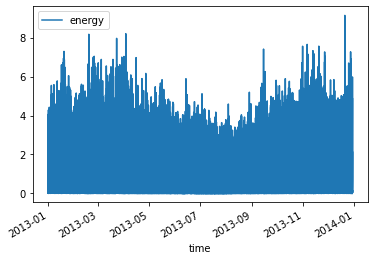

In [6]:
df.plot(x='time', y='energy')

In [7]:
# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['time'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [8]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['time'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

In [9]:
# time with int to plot easily
df['time_epoch'] = (df['time'].astype(np.int64)/100000000000).astype(np.int64)

In [10]:
# creation of 4 distinct categories
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0] # WeekEnd Night
b = df.loc[df['categories'] == 1] # WeekEnd Day
c = df.loc[df['categories'] == 2] # WeekDay Night
d = df.loc[df['categories'] == 3] # WeekDay Day

a = a.groupby(['house', pd.Grouper(key='time', freq='W-MON')])['energy'].sum().reset_index().sort_values(['house', 'time'])
b = b.groupby(['house', pd.Grouper(key='time', freq='W-MON')])['energy'].sum().reset_index().sort_values(['house', 'time'])
c = c.groupby(['house', pd.Grouper(key='time', freq='W-MON')])['energy'].sum().reset_index().sort_values(['house', 'time'])
d = d.groupby(['house', pd.Grouper(key='time', freq='W-MON')])['energy'].sum().reset_index().sort_values(['house', 'time'])


a = a.groupby(['time'])['energy'].sum().reset_index().sort_values('time')
b = b.groupby(['time'])['energy'].sum().reset_index().sort_values('time')
c = c.groupby(['time'])['energy'].sum().reset_index().sort_values('time')
d = d.groupby(['time'])['energy'].sum().reset_index().sort_values('time')

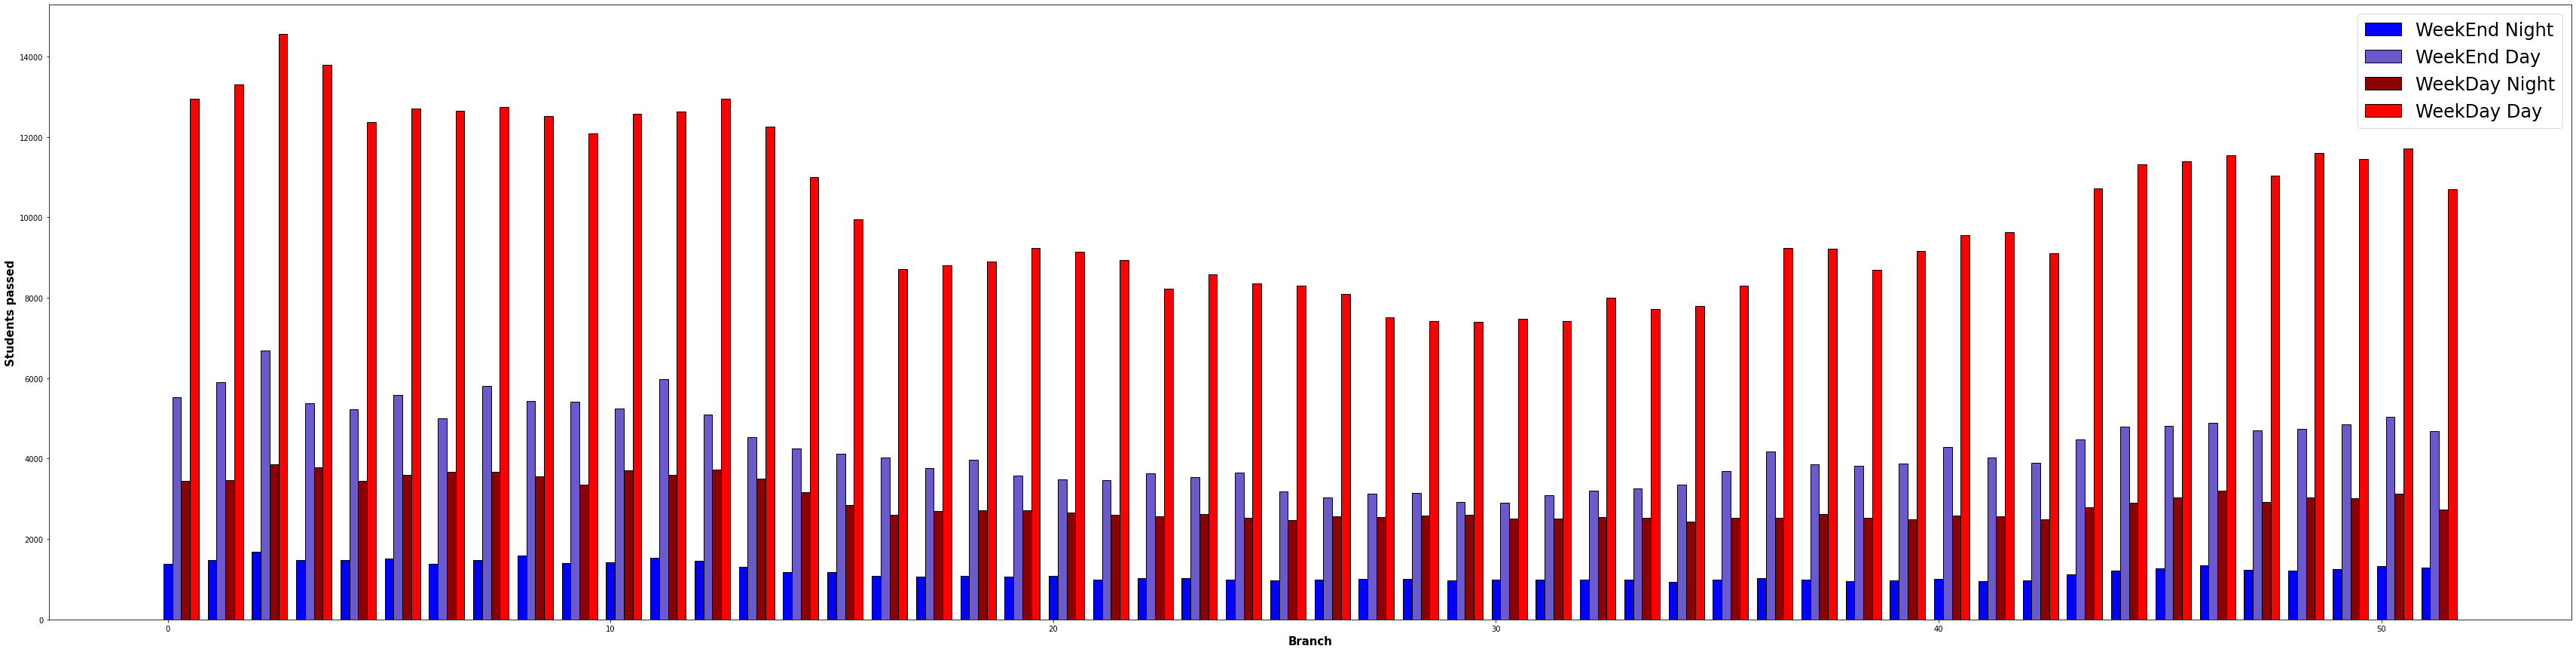

In [11]:
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(60, 15))

weeks = list(range(1, 60))
label=['WeekEnd Night', 'WeekEnd Day', 'WeekDay Night', 'WeekDay Day']
 
# Set position of bar on X axis
br1 = np.arange(len(a))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, a['energy'], color ='blue', width = barWidth,
        edgecolor ='black', label ='WeekEnd Night')

plt.bar(br2, b['energy'], color ='slateblue', width = barWidth,
        edgecolor ='black', label ='WeekEnd Day')

plt.bar(br3, c['energy'], color ='darkred', width = barWidth,
        edgecolor ='black', label ='WeekDay Night')

plt.bar(br4, d['energy'], color ='red', width = barWidth,
        edgecolor ='black', label ='WeekDay Day')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len(a))],
#        weeks)
 
plt.legend(loc='upper right', prop={'size': 24})
plt.show()
#lux mais cara durante o dia

In [22]:
df_weather.info()
#df_weather.sort_values('temperatureMaxTime').head(3)
#df_weather.sort_values('temperatureMaxTime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 427 to 791
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   temperatureMax               363 non-null    float64       
 1   temperatureMaxTime           363 non-null    datetime64[ns]
 2   windBearing                  363 non-null    int64         
 3   icon                         363 non-null    object        
 4   dewPoint                     363 non-null    float64       
 5   temperatureMinTime           363 non-null    object        
 6   cloudCover                   363 non-null    float64       
 7   windSpeed                    363 non-null    float64       
 8   pressure                     363 non-null    float64       
 9   apparentTemperatureMinTime   363 non-null    object        
 10  apparentTemperatureHigh      363 non-null    float64       
 11  precipType                   363 non-null  

<AxesSubplot:xlabel='temperatureMax'>

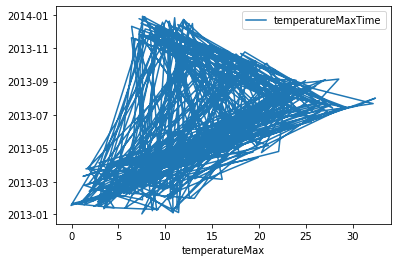

In [16]:
df_weather.plot(x='temperatureMax', y='temperatureMaxTime')

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
434,7.49,2013-01-01 01:00:00,257,partly-cloudy-day,2.40,2013-01-01 15:00:00,0.43,4.00,1016.89,2013-01-01 16:00:00,...,5.76,2013-01-01 08:07:21,2013-01-01 08:00:00,2013-01-01 11:00:00,Partly cloudy throughout the day.,2013-01-01 19:00:00,0.23,2013-01-01 23:00:00,2013-01-01 19:00:00,0.63
623,10.82,2013-01-02 22:00:00,242,partly-cloudy-night,5.41,2013-01-02 03:00:00,0.61,3.72,1023.12,2013-01-02 04:00:00,...,9.86,2013-01-02 08:07:12,2013-01-02 19:00:00,2013-01-02 12:00:00,Mostly cloudy throughout the day.,2013-01-03 07:00:00,0.23,2013-01-02 22:00:00,2013-01-03 07:00:00,0.66
553,11.41,2013-01-03 13:00:00,255,partly-cloudy-day,9.12,2013-01-03 07:00:00,0.66,4.36,1032.61,2013-01-03 07:00:00,...,11.41,2013-01-03 08:07:00,2013-01-03 13:00:00,2013-01-03 11:00:00,Mostly cloudy throughout the day.,2013-01-04 07:00:00,7.07,2013-01-03 13:00:00,2013-01-04 06:00:00,0.70
